#  Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette("rainbow")
%matplotlib inline

# Import / Load Dataset

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

### Univariate Analysis

In [4]:
Count_features = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
Count_list= list(enumerate(Count_features))

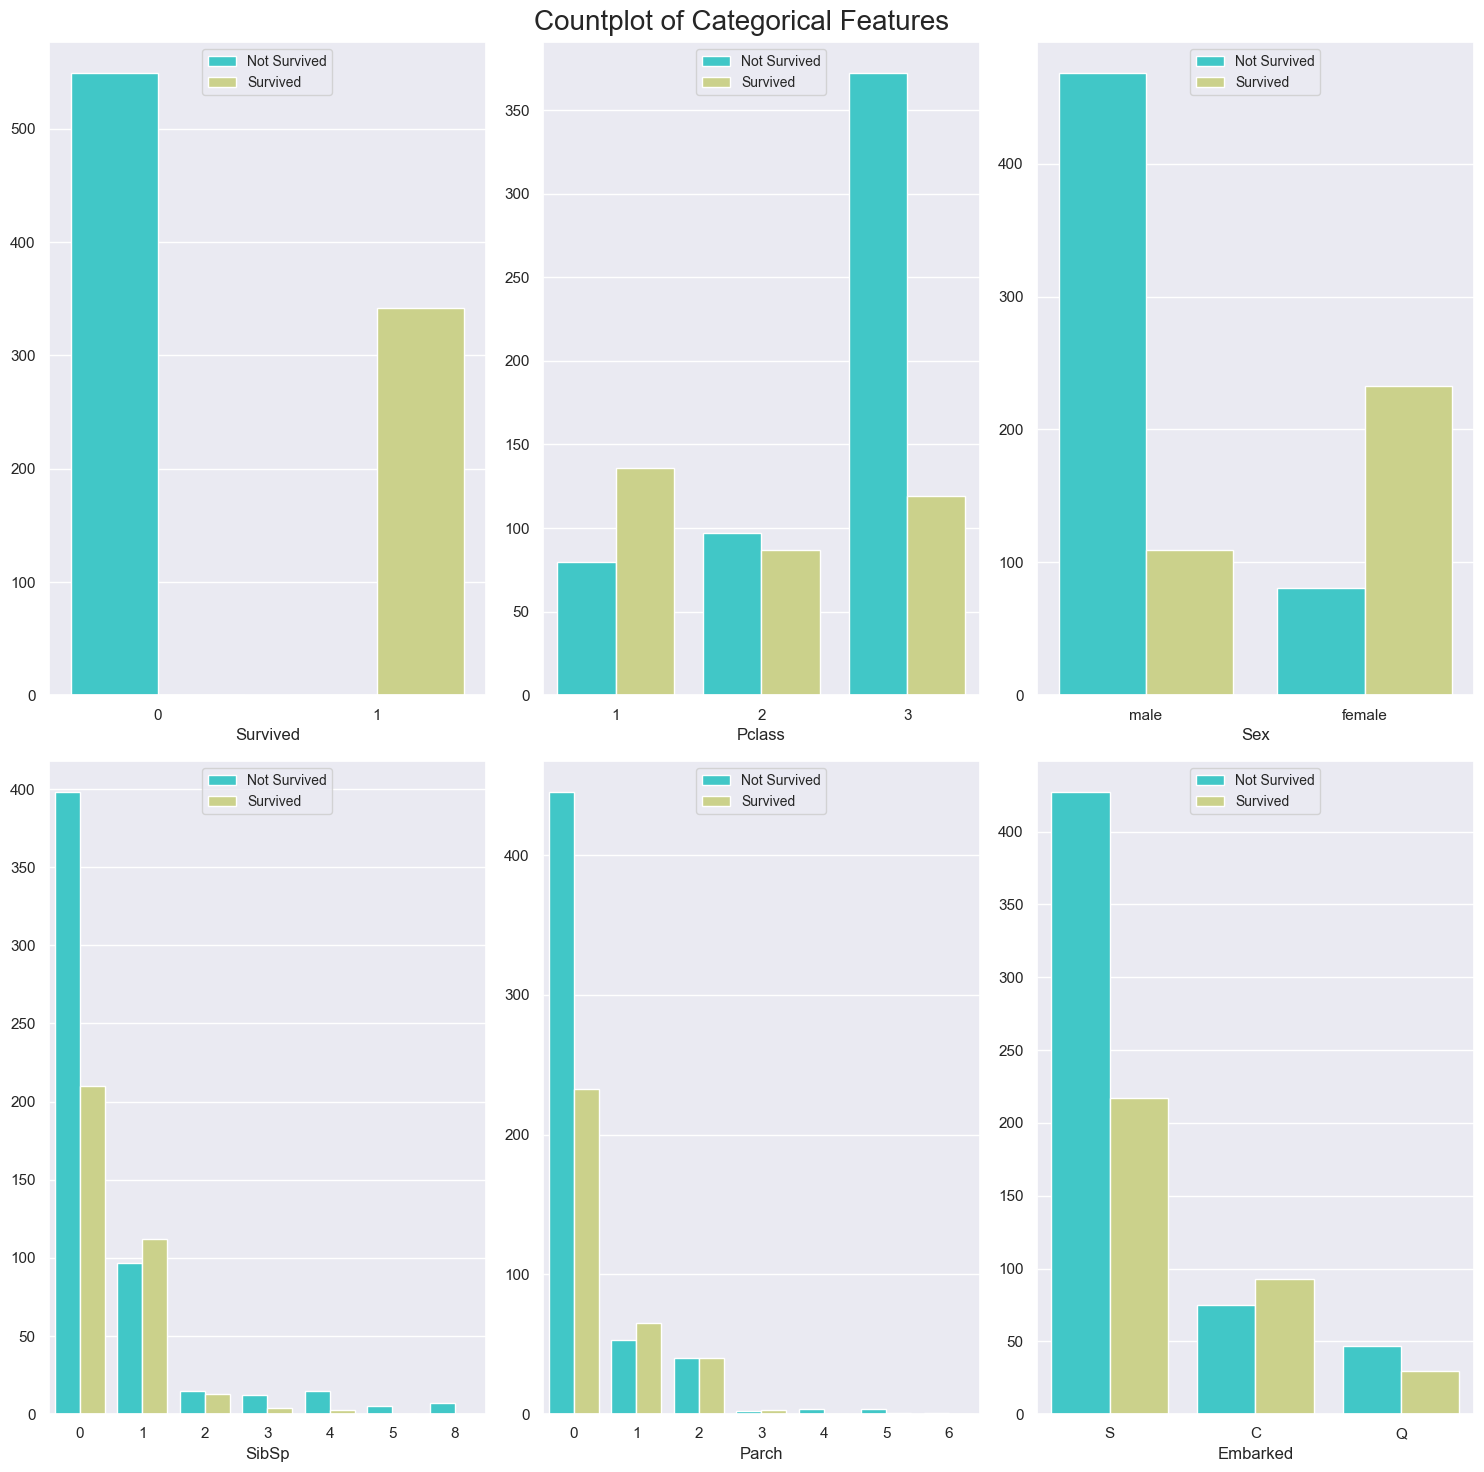

In [5]:
plt.figure(figsize = (15,15))
plt.suptitle("Countplot of Categorical Features", fontsize=20)
for i in Count_list: 
    plt.subplot(2,3,i[0]+1)
    sns.countplot(data = train, x = i[1], hue = "Survived", palette="rainbow")
    plt.ylabel("")
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
plt.tight_layout()
plt.show()

In [6]:
num_feature = ['Age','Fare']
enumfeat = list(enumerate(num_feature))

C:\Users\rajpu\AppData\Local\Temp\ipykernel_2980\1397729599.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = train[i[1]], palette="rainbow", bins=15)
C:\Users\rajpu\AppData\Local\Temp\ipykernel_2980\1397729599.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = train[i[1]], palette="rainbow", bins=15)


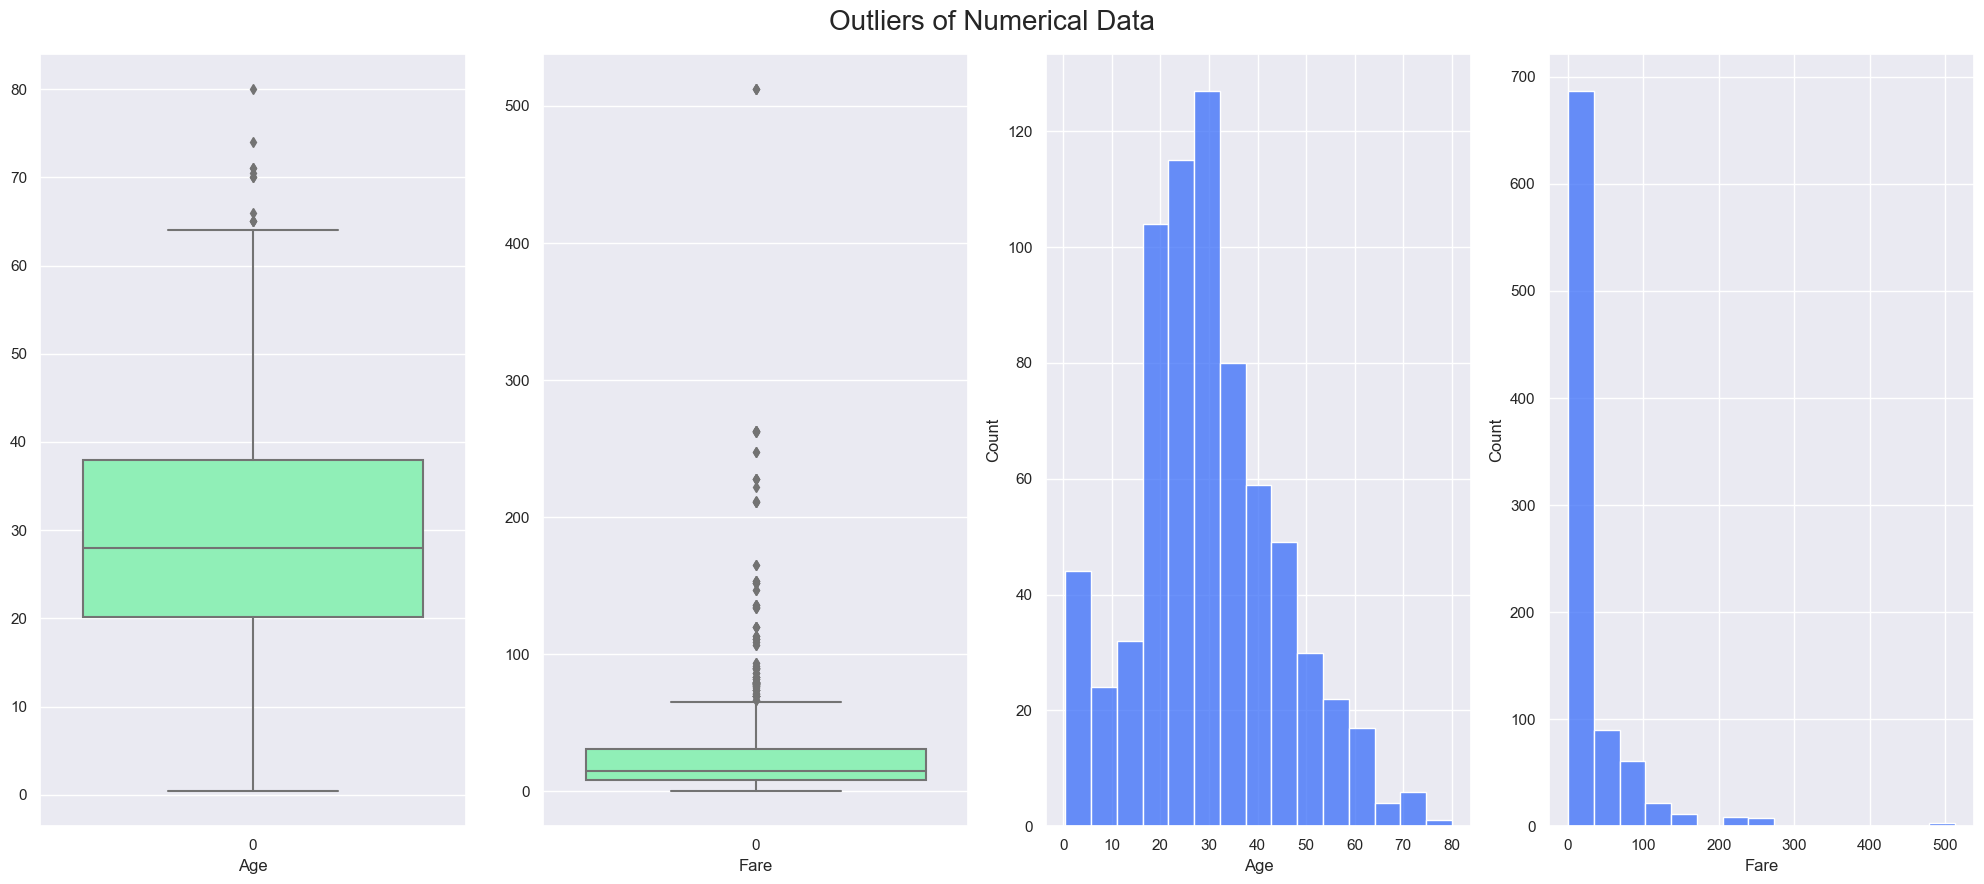

In [7]:
plt.figure(figsize=(20,9))
plt.suptitle("Outliers of Numerical Data",fontsize=20)
for i in enumfeat:
    plt.subplot(1,4,i[0]+1)
    sns.boxplot(data = train[i[1]], palette="rainbow")
    plt.xlabel(str(i[1]))
# plt.tight_layout()
for i in enumfeat:
    plt.subplot(1,4,i[0]+3)
    sns.histplot(data = train[i[1]], palette="rainbow", bins=15)
    plt.xlabel(str(i[1]))
plt.tight_layout()
plt.show()

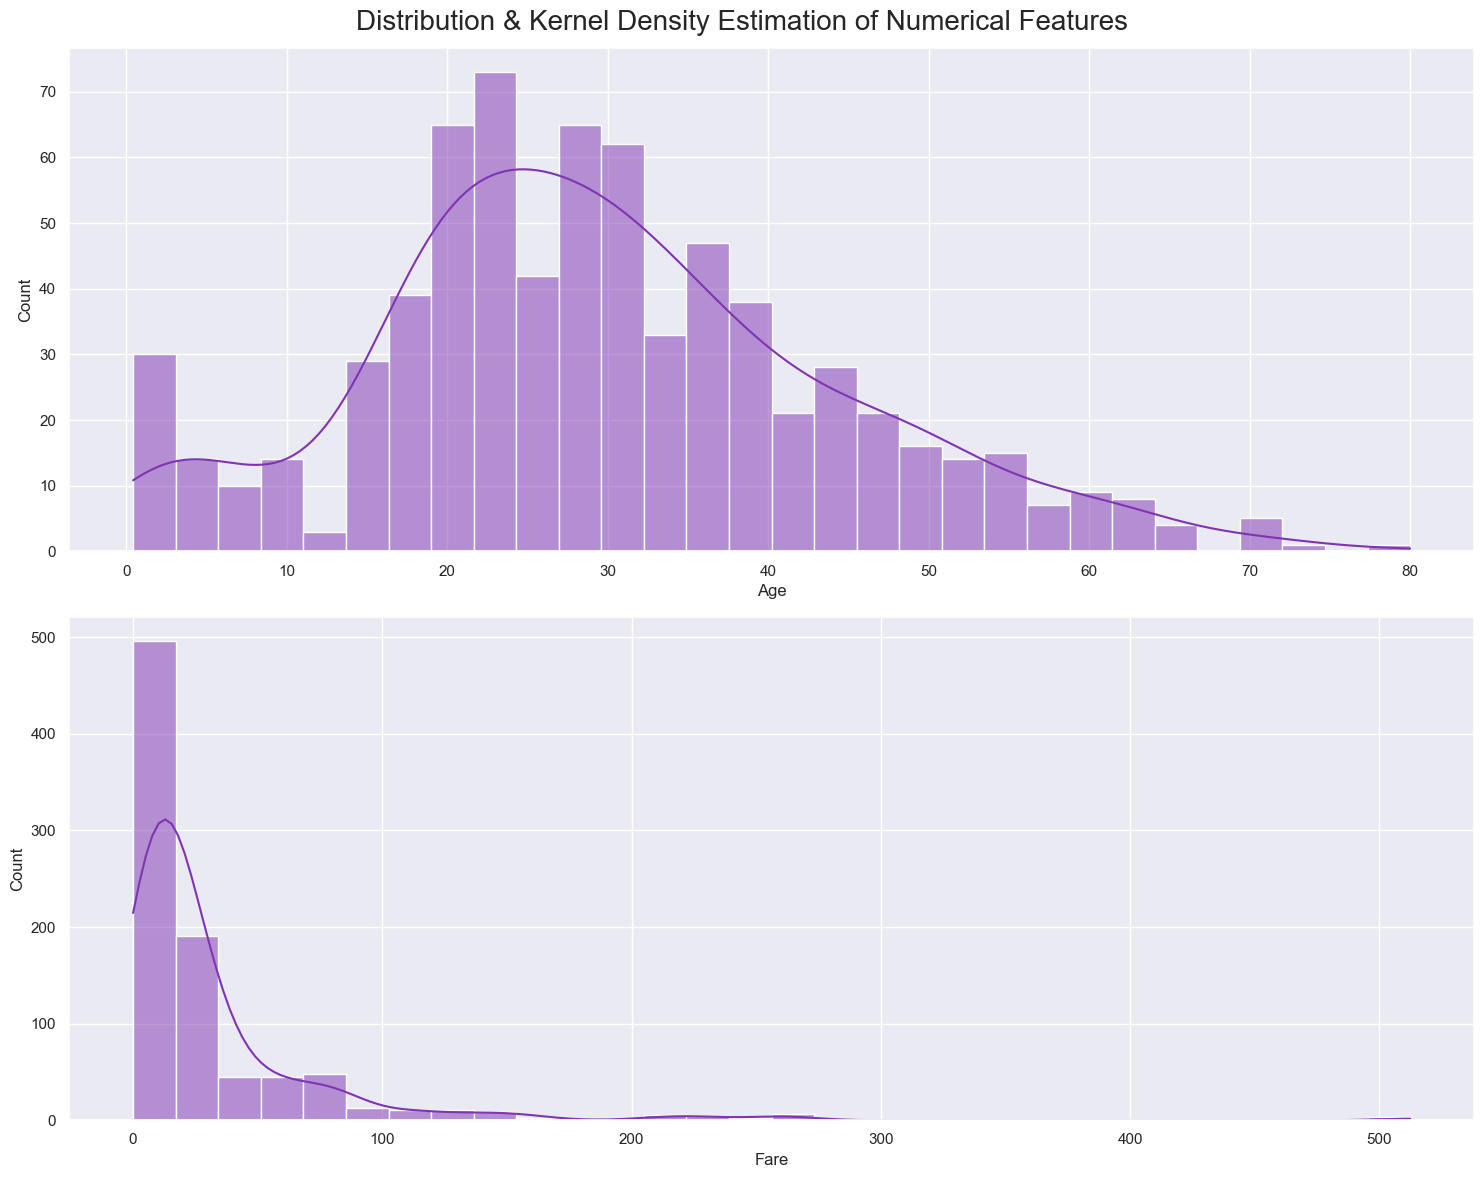

In [8]:
plt.figure(figsize=(15,12))
plt.suptitle("Distribution & Kernel Density Estimation of Numerical Features", fontsize=20)
for i in enumfeat:
    plt.subplot(2,1,i[0]+1)
    sns.histplot(x = train[i[1]], kde=True, bins=30, color=(0.50,0.20,0.70))
plt.tight_layout()
plt.show()

# Bivariate and Multivariate Analysis

C:\Users\rajpu\AppData\Local\Temp\ipykernel_2980\4032638859.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()["Survived"].sort_values(ascending=False)[1:]


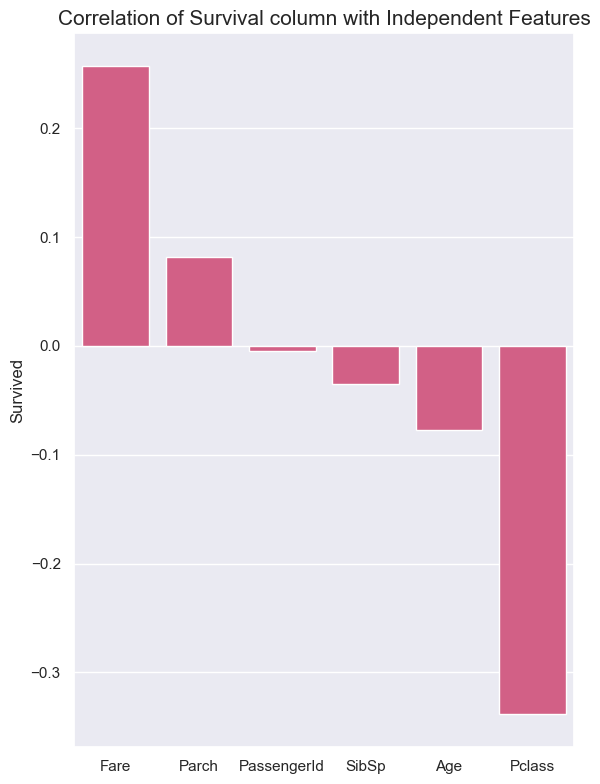

In [9]:
plt.figure(figsize=(6,8))
plt.title("Correlation of Survival column with Independent Features", fontsize=15)
corr = train.corr()["Survived"].sort_values(ascending=False)[1:]
sns.barplot(x=corr.index, y=corr, color=(0.90,0.30,0.50))
plt.tight_layout()
plt.show()

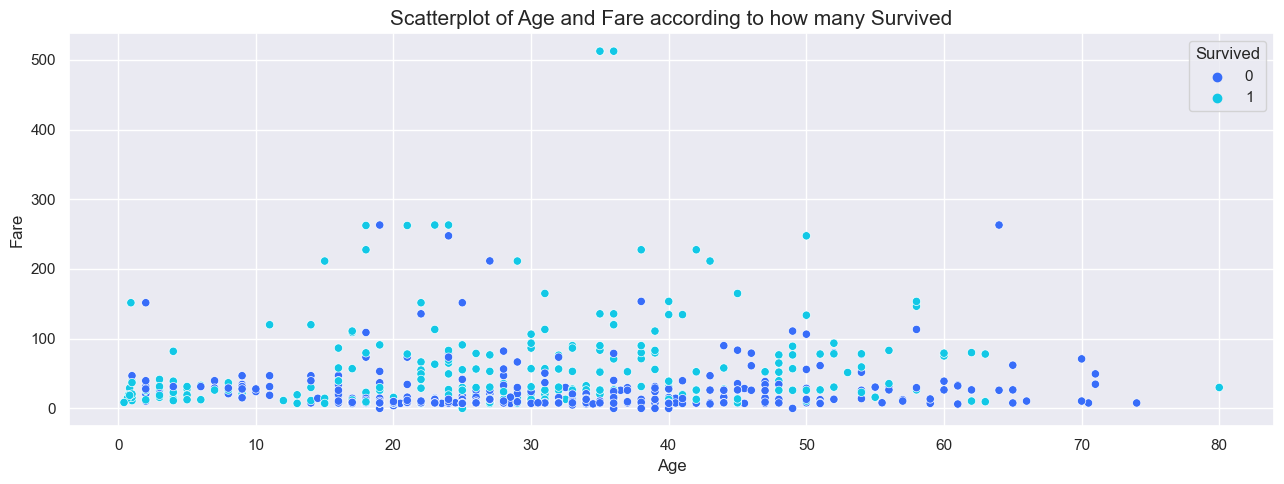

In [10]:
plt.figure(figsize=(13,5))
plt.title("Scatterplot of Age and Fare according to how many Survived", fontsize=15)
sns.scatterplot(data = train, x = "Age", y="Fare", hue='Survived')
plt.tight_layout()
plt.show()

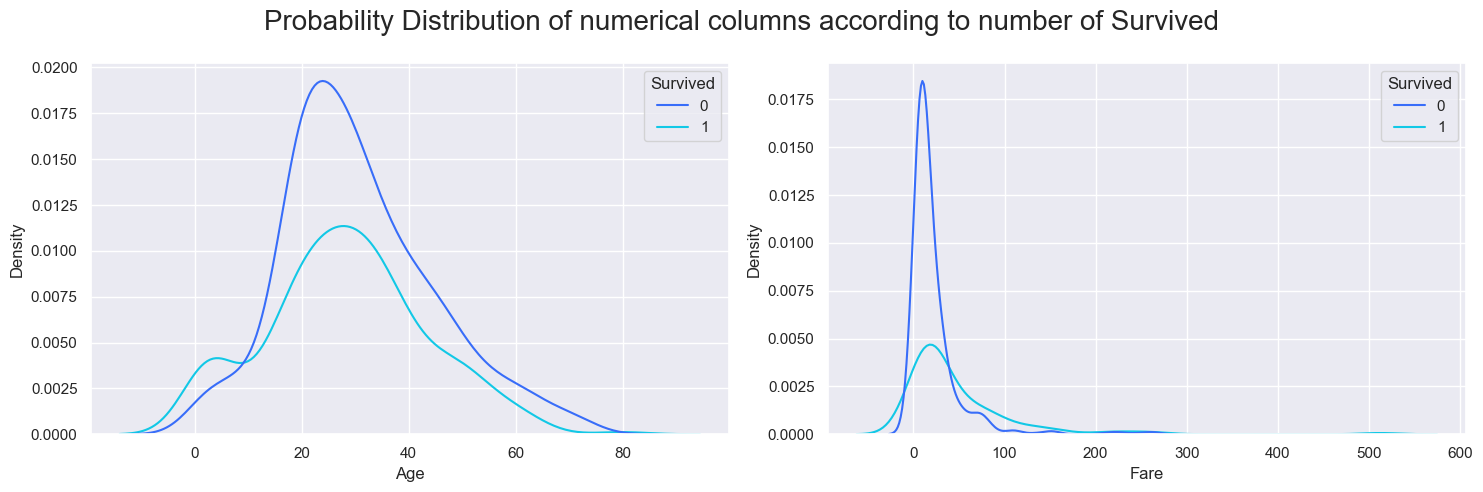

In [11]:
plt.figure(figsize=(15,5))
plt.suptitle("Probability Distribution of numerical columns according to number of Survived", fontsize = 20)
for i in enumfeat:
    plt.subplot(1,2,i[0]+1)
    sns.kdeplot(data=train, x=i[1], hue="Survived")
plt.tight_layout()
plt.show()

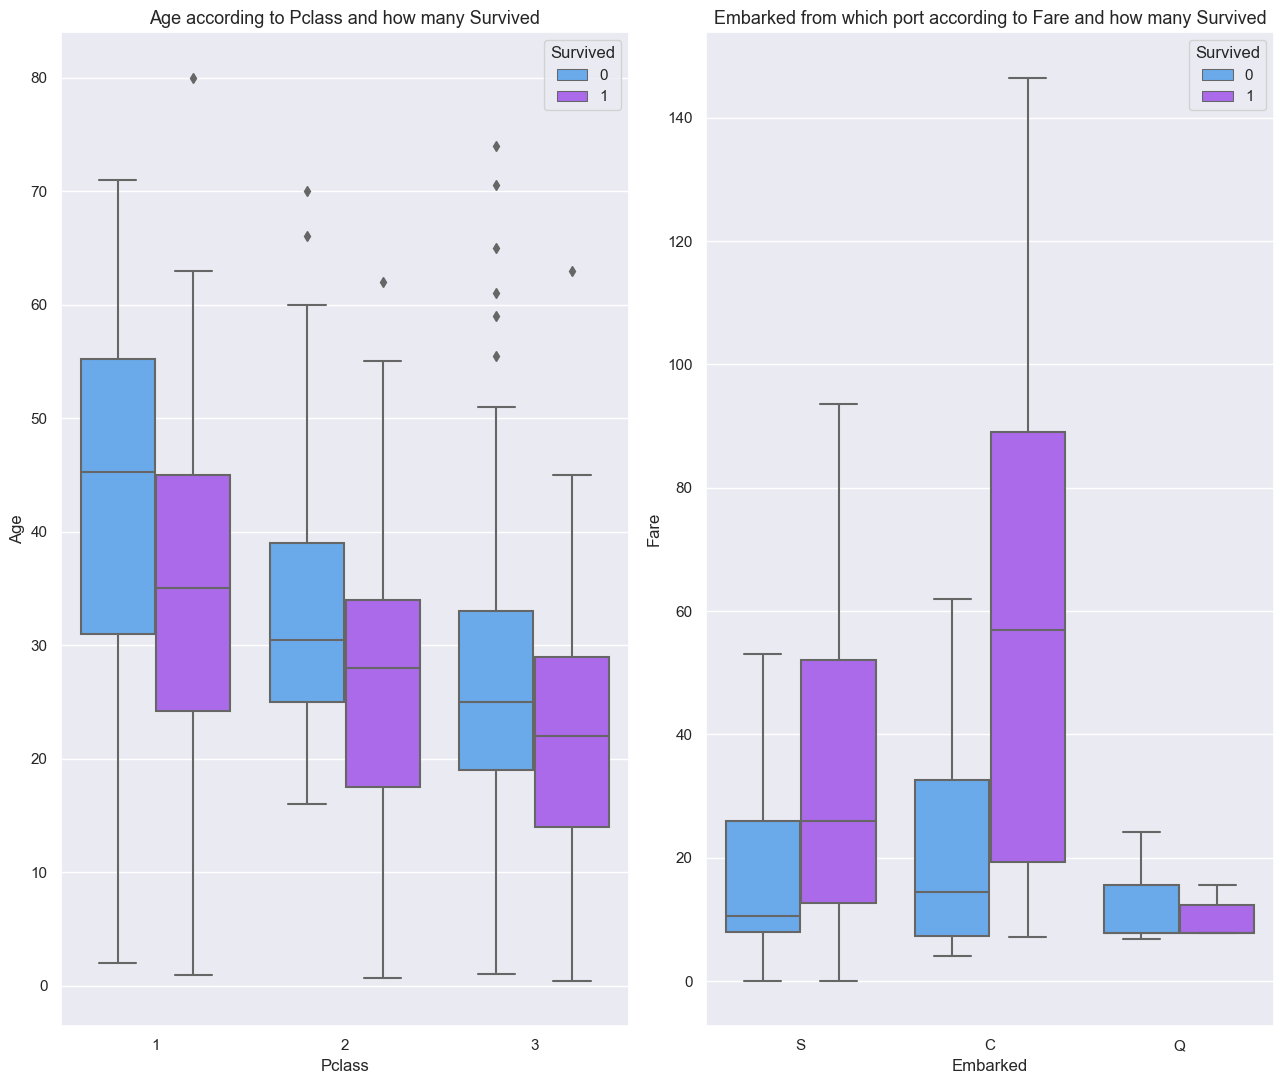

In [12]:
plt.figure(figsize=(13,11))

plt.subplot(1,2,1)
plt.title("Age according to Pclass and how many Survived", fontsize=13)
sns.boxplot(data = train, y ="Age", x ="Pclass", hue="Survived", palette="cool")

#Two extreme outliers were ruining the boxplot on the right. Showfliers parameter has been used to remove the outliers of Fare. 
plt.subplot(1,2,2)
plt.title("Embarked from which port according to Fare and how many Survived", fontsize=13)
sns.boxplot(data = train, y ="Fare", x ="Embarked", hue="Survived", palette="cool", showfliers=False)

plt.tight_layout()
plt.show()

# Train test split

In [13]:
def dropcol(data):
    data.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)
dropcol(data=train)

In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=["Survived"]), train["Survived"], 
                                                    test_size=0.2, random_state=42)

# Data preprocessing

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2

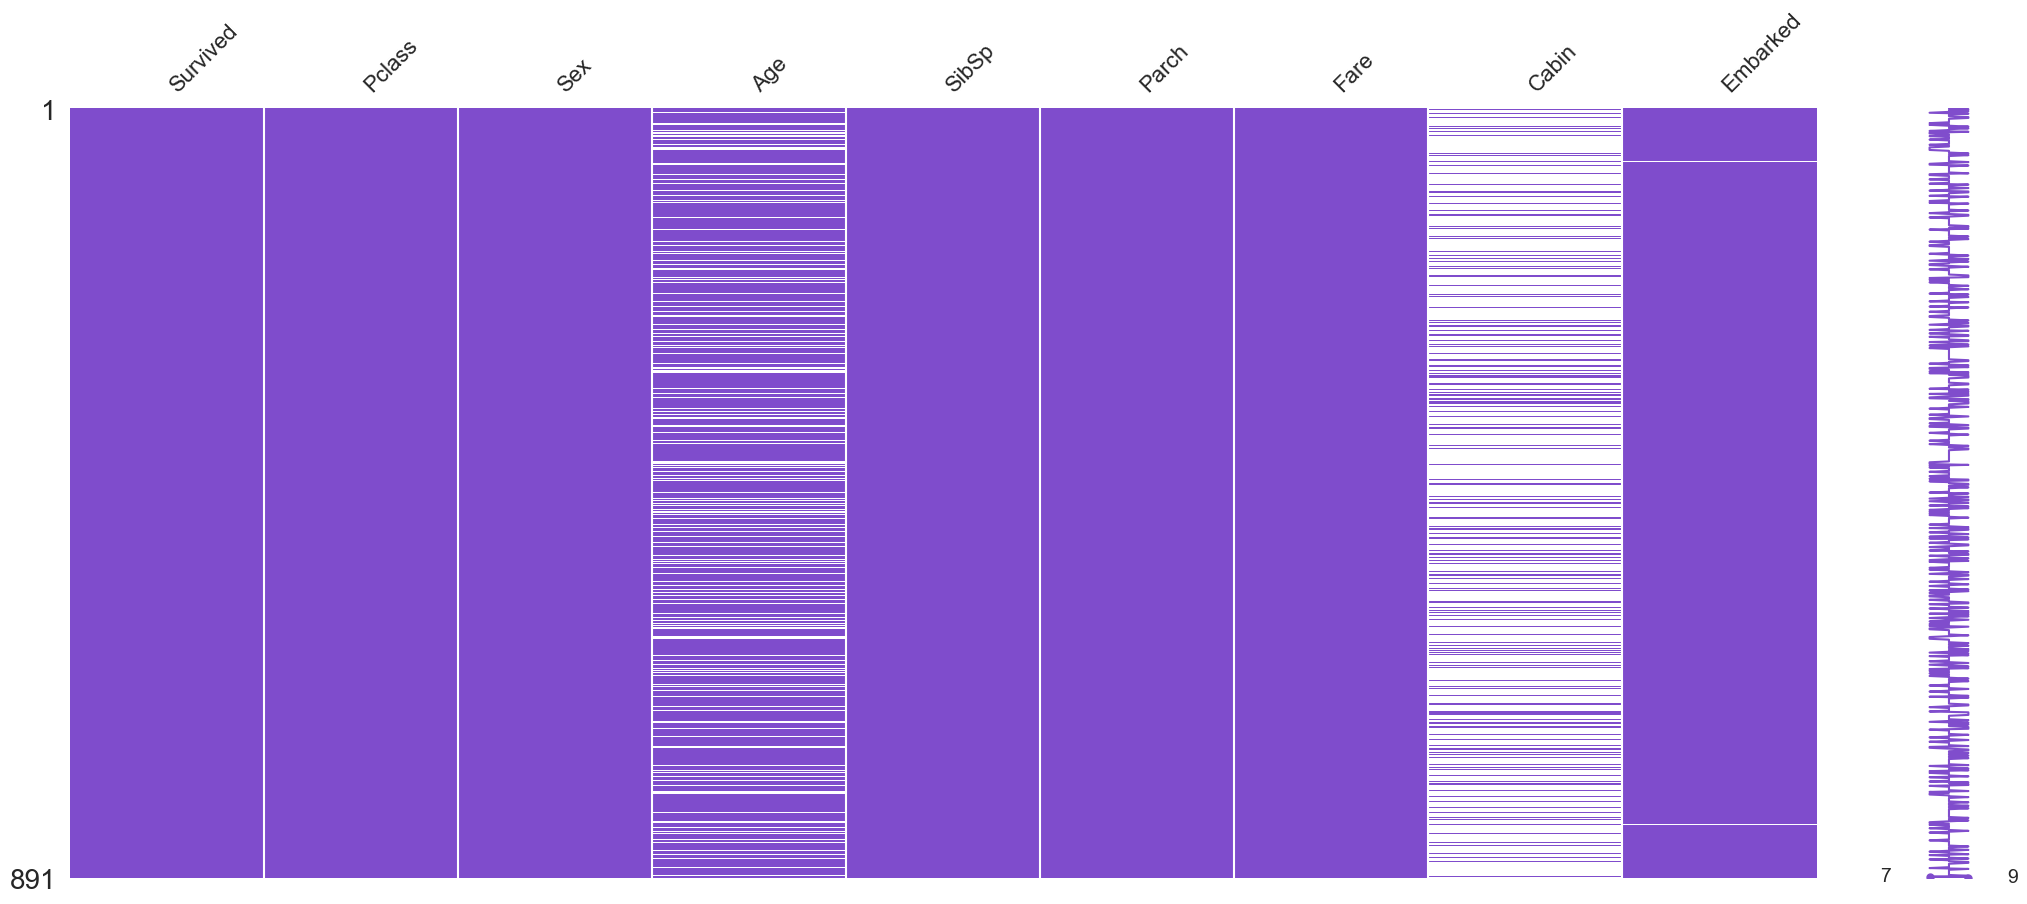

There are 177 missing values in column: Age
There are 687 missing values in column: Cabin
There are 2 missing values in column: Embarked


In [17]:
import missingno as msno
msno.matrix(train, color=(0.50,0.30,0.80))
plt.show()
x = train.isnull().sum()
for a, b in x.items():
    if b > 0:
        print(f"There are {b} missing values in column: {a}")

In [18]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,1,male,45.5,0,0,28.5000,C124,S
733,2,male,23.0,0,0,13.0000,NaN,S
382,3,male,32.0,0,0,7.9250,NaN,S
704,3,male,26.0,1,0,7.8542,NaN,S
813,3,female,6.0,4,2,31.2750,NaN,S


In [19]:
def cabinnull(data):
    data["Cabin"].fillna("M", inplace=True)
cabinnull(X_train)
cabinnull(X_test)

In [20]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,1,male,45.5,0,0,28.5000,C124,S
733,2,male,23.0,0,0,13.0000,M,S
382,3,male,32.0,0,0,7.9250,M,S
704,3,male,26.0,1,0,7.8542,M,S
813,3,female,6.0,4,2,31.2750,M,S


In [21]:
#handling missing values
tf1 = ColumnTransformer(transformers=[
    ("AgeImputer", SimpleImputer(), [2]),
    ("EmbarkedImputer", SimpleImputer(strategy="most_frequent"), [-1])
], remainder="passthrough")

In [22]:
#encoding categorical features
tf2 = ColumnTransformer(transformers=[
    ("SexEncoder", OrdinalEncoder(), [3]),
    ("EmbarkedOneHot", OneHotEncoder(sparse=False, handle_unknown="ignore"), [1,7])
], remainder="passthrough")

In [23]:
# Scaling
tf3 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,-1))
])

In [24]:
# Model
tf4 = LogisticRegression()

In [25]:
pipe = make_pipeline(tf1,tf2,tf3,tf4)

In [26]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [63]:
pipe.fit(X_train, y_train)

C:\Users\rajpu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('AgeImputer', SimpleImputer(),
                                                  [2]),
                                                 ('EmbarkedImputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [-1])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SexEncoder',
                                                  OrdinalEncoder(), [3]),
                                                 ('EmbarkedOneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 7])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, -1, None))])),
                ('logisticregression', LogisticRegression())])

# Prediction and Accuracy Score

In [28]:
y_pred = pipe.predict(X_test)

In [29]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[88, 17],
       [18, 56]], dtype=int64)

In [30]:
tp,fn,fp,tn = confusion_matrix(y_test,y_pred).reshape(-1)
print('tp:',tp)
print('fp:',fp)
print('fn:',fn)
print('tn:',tn)

tp: 88
fp: 18
fn: 17
tn: 56


In [31]:
#accuracy score
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy=round(accuracy,3)*100
print(f"The accuracy of the model is: {accuracy}%")

The accuracy of the model is: 80.4%


In [32]:
precision = tp/(tp+fp)
precision

0.8301886792452831

In [33]:
recall = tp/(tp+fn)
recall

0.8380952380952381

In [34]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [48]:
TPR=tp/(tp+fn)
print(TPR)
FPR=fp/(fp+tn)
print(FPR)

0.8380952380952381
0.24324324324324326


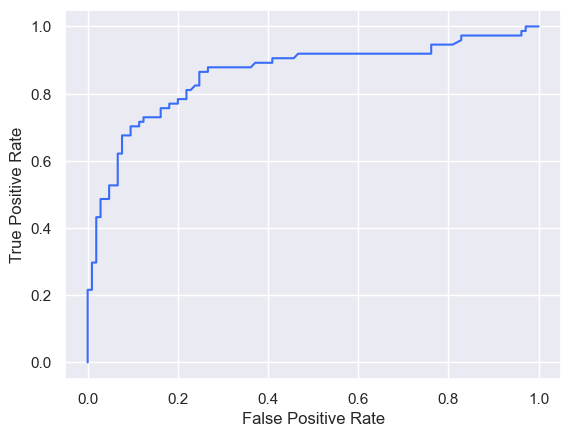

In [64]:
y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



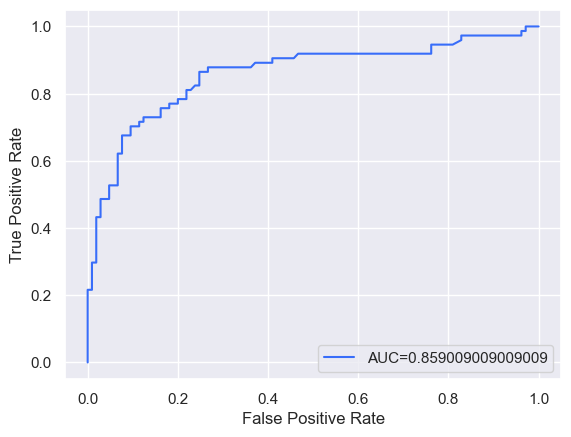

In [65]:
#define metrics
y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()